# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Nurdiansyah Krisna Putra]
- **Email:** [nurdiansyahkrisnaputra@students.amikom.ac.id]
- **ID Dicoding:** [nurdiansyah_krisna_putra_qgms]

## Menentukan Pertanyaan Bisnis

- Bagaimana performa perentalan sepeda dalam satu tahun terakhir
- Bagaimana cuaca ( temp, wind, hum ) mempengaruhi perentalan
- Hari apa dengan perbedaan data antara day_df dan hour_df yang tinggi ( Kesalahan perekaman)  

## Import semua library yang dibutuhkan

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Wrangling

### About Data

This dataset contains the hourly and daily count of rental bikes between the years 2011 and 2012 in the Capital bike share system with the corresponding weather and seasonal information.

Data Set Information:

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.
Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.
Attribute Information:
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

instant: record index

dteday : date

season : season (1:springer, 2:summer, 3:fall, 4:winter)

yr : year (0: 2011, 1:2012)

mnth : month ( 1 to 12)

hr : hour (0 to 23)

holiday : weather day is holiday or not (extracted from [Web Link])

weekday : day of the week

workingday : if day is neither weekend nor holiday is 1, otherwise is 0.

weathersit :

1: Clear, Few clouds, Partly cloudy, Partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)

atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)

hum: Normalized humidity. The values are divided to 100 (max)

windspeed: Normalized wind speed. The values are divided to 67 (max)

casual: count of casual users

registered: count of registered users

cnt: count of total rental bikes including both casual and registered

### Gathering Data

In [ ]:
day_df = pd.read_csv("/content/drive/My Drive/Bangkit/Project/Data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hour_df = pd.read_csv("/content/drive/My Drive/Bangkit/Project/Data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


####**Insight:**

- Kedua data set berhasil diakses

### Assessing Data

#### Menilai tabel `customers_df`

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai tabel `hour_df`

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
hour_df.nunique()

,0
instant,17379
dteday,731
season,4
yr,2
mnth,12
hr,24
holiday,2
weekday,7
workingday,2
weathersit,4


In [ ]:
print("Jumlah duplikasi: ",hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


####**Insight:**

- Data cuaca tampaknya sudah dinormalisasi
- Kedua data set ini memiliki attribut yang sama ( + hr untuk hour_df )
- Data hari dimulai dari 0
- Tidak ada nilai null pada data

### Cleaning Data

#### Membersihkan tabel `hour_df`

Bisa dilihat dari bagian Accessing Data jika data ini sudah bersih tanpa ada missing value, duplicate, dan innacurate data. namun saya tetap melakukan cleaning agar langkah langkahnya lengkap, andaikan data ini memiliki 3 masalah tersebut.

##### Duplicate data

In [ ]:
hour_df.duplicated().sum()

0

In [ ]:
hour_df.drop_duplicates(inplace=True)

In [ ]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


##### Missing values

In [ ]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [ ]:
hour_df[hour_df.casual.isna()]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [ ]:
hour_df.casual.value_counts()

,count
casual,
0,1581
1,1082
2,798
3,697
4,561
...,...
332,1
361,1
356,1


In [ ]:
hour_df.fillna(value=hour_df.casual.mean(), inplace=True)

In [ ]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


##### Inaccurate value

In [ ]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
hour_df[hour_df.weekday == hour_df.weekday.max()]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17326,17327,2012-12-29,1,1,12,19,0,6,0,2,0.30,0.2424,0.61,0.2537,7,90,97
17327,17328,2012-12-29,1,1,12,20,0,6,0,2,0.30,0.2424,0.56,0.5522,2,64,66
17328,17329,2012-12-29,1,1,12,21,0,6,0,2,0.28,0.2424,0.56,0.4925,4,56,60
17329,17330,2012-12-29,1,1,12,22,0,6,0,2,0.26,0.2424,0.60,0.4627,3,51,54


In [ ]:
hour_df.weekday.replace(hour_df.weekday.max(), 6, inplace=True)

<ipython-input-23-48ab079f3cd0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hour_df.weekday.replace(hour_df.weekday.max(), 6, inplace=True)


In [ ]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


#### Membersihkan tabel `orders_df`

Data sudah bersih

####**Insight:**

- Data tidak memiliki nilai null, duplicate, dan innacurate

## Exploratory Data Analysis (EDA)

### Explore `hour_df`

In [ ]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
12834,12835,2012-06-23,3,1,6,23,0,6,0,1,0.72,0.6515,0.44,0.0000,69,156,225
1790,1791,2011-03-20,1,0,3,7,0,0,0,1,0.24,0.2273,0.60,0.2239,5,9,14
9182,9183,2012-01-23,1,1,1,12,0,1,1,2,0.22,0.2727,0.93,0.0000,10,52,62
2948,2949,2011-05-07,2,0,5,18,0,6,0,1,0.58,0.5455,0.37,0.1642,114,175,289
5839,5840,2011-09-05,3,0,9,18,1,1,0,1,0.66,0.5909,0.89,0.0896,31,92,123


In [ ]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [ ]:
hour_df.instant.is_unique

True

In [ ]:
hour_df.instant.duplicated

<bound method Series.duplicated of 0            1
1            2
2            3
3            4
4            5
         ...  
17374    17375
17375    17376
17376    17377
17377    17378
17378    17379
Name: instant, Length: 17379, dtype: int64>

In [ ]:
hour_df.groupby(by="hr").agg({
    "instant": "nunique",
    "casual": ["max", "min", "mean", "std", ],
    "registered": ["max", "min", "mean", "std", ]
})

instant casual                           registered                  \
   nunique    max min       mean        std        max min        mean   
hr                                                                       
0      726     68   0  10.158402  10.667953        234   0   43.739669   
1      724     49   0   6.504144   7.735334        139   0   26.871547   
2      715     44   0   4.772028   6.514780        104   0   18.097902   
3      697     26   0   2.715925   4.315795         61   0    9.011478   
4      697     13   0   1.253945   1.887669         22   0    5.098996   
5      717     16   0   1.411437   1.790581         64   0   18.478382   
6      725     19   0   4.161379   3.691509        203   0   71.882759   
7      727     40   0  11.055021   8.356205        572   1  201.009629   
8      727     69   0  21.679505  13.741229        808   4  337.331499   
9      727    142   0  30.891334  24.472856        399   6  188.418157   
10     727    209   0  46.477304  41.346206        351   8  127.191197   
11     727    268   0  59.540578  54.481788        446   5  148.602476   
12     728    362   0  68.293956  64.394237        526   3  185.021978   
13     729    355   0  72.308642  69.819228        491   9  181.352538   
14     729    361   0  75.567901  71.599225        502  12  165.381344   
15     729    357   0  74.905350  70.289359        456   4  176.327846   
16     730    367   0  73.745205  67.015206        481   8  238.238356   
17     730    347   0  74.273973  61.491021        885  14  387.178082   
18     728    266   0  61.120879  50.981553        886  20  364.390110   
19     728    230   0  48.770604  42.328913        662  11  262.752747   
20     728    237   0  36.233516  32.103347        461   8  189.796703   
21     728    222   0  28.255495  25.378252        362   6  144.059066   
22     728    175   0  22.252747  20.450211        327   5  109.082418   
23     728     71   0  15.199176  13.804596        220   2   72.631868   

                
           std  
hr              
0    34.019585  
1    27.344153  
2    21.303895  
3     9.743691  
4     3.134479  
5    12.674751  
6    53.535307  
7   157.120459  
8   229.698404  
9    84.633490  
10   66.281668  
11   79.090301  
12   89.240873  
13   87.424775  
14   84.055205  
15   84.488219  
16  103.765726  
17  211.676303  
18  203.599896  
19  138.708622  
20  100.293791  
21   73.149848  
22   55.252765  
23   40.446431

In [ ]:
hour_df.groupby(by="mnth").instant.nunique().sort_values(ascending=False)

,instant
mnth,
5,1488
7,1488
12,1483
8,1475
3,1473
10,1451
6,1440
4,1437
9,1437


In [ ]:
hour_df.groupby(by="weekday").instant.nunique().sort_values(ascending=False)

,instant
weekday,
6,2512
0,2502
5,2487
1,2479
3,2475
4,2471
2,2453


In [ ]:
selisih = abs(hour_df["registered"] - hour_df["casual"])
hour_df["selisih"] = selisih

In [ ]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,selisih
2212,2213,2011-04-07,2,0,4,1,0,4,1,1,0.42,0.4242,0.47,0.1343,2,11,13,9
16571,16572,2012-11-28,4,1,11,5,0,3,1,2,0.26,0.2727,0.70,0.1343,0,39,39,39
15339,15340,2012-10-06,4,1,10,8,0,6,0,1,0.56,0.5303,0.83,0.1940,22,184,206,162
3689,3690,2011-06-07,2,0,6,15,0,2,1,2,0.82,0.7424,0.41,0.3284,56,127,183,71
15746,15747,2012-10-23,4,1,10,7,0,2,1,2,0.44,0.4394,0.77,0.1045,12,519,531,507


### Explore `day_df`

In [ ]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
609,610,2012-09-01,3,1,9,0,6,0,2,0.753333,0.702654,0.638333,0.113187,2352,3788,6140
453,454,2012-03-29,2,1,3,0,4,1,1,0.494167,0.482304,0.439167,0.319650,834,5299,6133
342,343,2011-12-09,4,0,12,0,5,1,1,0.290833,0.317542,0.695833,0.082717,261,3359,3620
574,575,2012-07-28,3,1,7,0,6,0,1,0.755833,0.697604,0.613333,0.157350,2234,4451,6685
269,270,2011-09-27,4,0,9,0,2,1,2,0.636667,0.574525,0.885417,0.118171,477,3643,4120


In [ ]:
selisih = abs(day_df["registered"] - day_df["casual"])
day_df["selisih"] = selisih

In [ ]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,selisih
487,488,2012-05-02,2,1,5,0,3,1,1,0.564167,0.537896,0.797083,0.138058,667,5502,6169,4835
362,363,2011-12-29,1,0,12,0,4,1,1,0.248333,0.263892,0.574167,0.119412,254,2169,2423,1915
542,543,2012-06-26,3,1,6,0,2,1,1,0.630833,0.594704,0.373333,0.347642,1077,6365,7442,5288
682,683,2012-11-13,4,1,11,0,2,1,2,0.343333,0.323225,0.662917,0.342046,327,3767,4094,3440
550,551,2012-07-04,3,1,7,1,3,0,1,0.789167,0.732337,0.538750,0.134950,2562,4841,7403,2279


In [ ]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,selisih
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,2808.658003
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452,1433.592927
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,18.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,1580.500000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,2789.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,3863.000000


<Axes: >

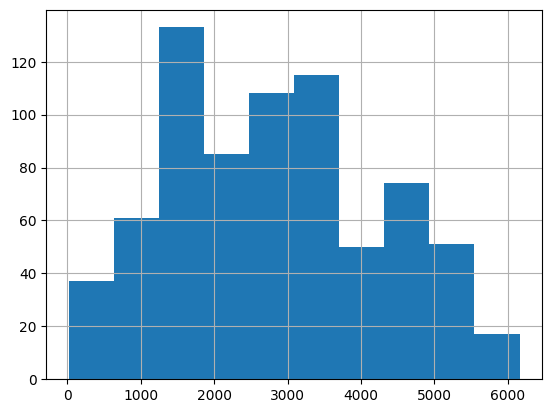

In [ ]:
day_df.selisih.hist()

In [ ]:
hour_df.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,selisih
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,97
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,73
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,76
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61,35
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49,25


In [ ]:
day_df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,selisih
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,1620
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,1807
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,1023
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796,1068
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729,1851


### Explore `hour_df` & `day_df`

#### Menggabungkan data `hour_df` dan `day_df`

In [ ]:
selisih_hour_sum = hour_df.groupby("dteday")["selisih"].sum().reset_index()
selisih_hour_sum.rename(columns={"selisih": "selisih_hour_sum"}, inplace=True)

In [ ]:
all_df = day_df.copy()
all_df = pd.merge(all_df, selisih_hour_sum, how="left", on="dteday")
all_df["selisih_match"] = all_df["selisih"] == all_df["selisih_hour_sum"]

In [ ]:
all_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,selisih,selisih_hour_sum,selisih_match
485,486,2012-04-30,2,1,4,0,1,1,2,0.464167,0.457696,0.570000,0.171638,665,4907,5572,4242,4242,True
410,411,2012-02-15,1,1,2,0,3,1,1,0.348333,0.351629,0.531250,0.181600,141,4028,4169,3887,3887,True
673,674,2012-11-04,4,1,11,0,0,0,1,0.325833,0.329538,0.532917,0.179108,1201,3906,5107,2705,2705,True
657,658,2012-10-19,4,1,10,0,5,1,2,0.563333,0.537896,0.815000,0.134954,753,4671,5424,3918,3918,True
664,665,2012-10-26,4,1,10,0,5,1,2,0.545833,0.522750,0.807083,0.132467,1182,6262,7444,5080,5080,True


In [ ]:
all_df["selisih_match"].value_counts()

,count
selisih_match,
True,582
False,149


###**Insight:**

- Perekaman data tertinggi pada bulan 5 dan terendah pada bulan 2
- perekaman data tertinggi pada hari minggu dan terendah pada hari rabu
- perental anggota paling banyak merental sepeda pukul 9 , 18, dan 19
- perental casual banyak meminjam sepeda mulai dari pukul 12 siang sampai 10 malam
- ternyata ada perbedaan perekaman jumlah rental pada day_df dan hour_df ( tampaknya kesalahan )

## Visualization & Explanatory Analysis

### Bagaimana Hubungan Antar Column pada Dataframe?

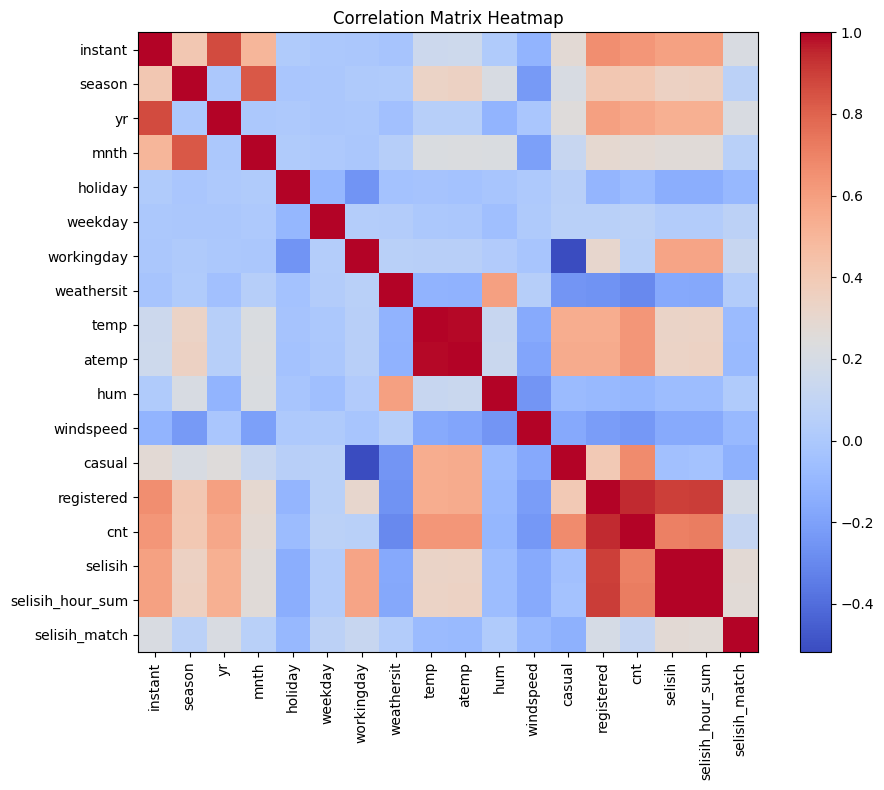

In [ ]:
df_corr = all_df.drop(columns=['dteday'])

correlation_matrix = df_corr.corr()
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap="coolwarm", interpolation="nearest")
plt.colorbar()

plt.xticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns)

plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()

### Bagaimana performa perentalan sepeda dalam satu tahun terakhir

In [52]:
df_total = all_df

In [53]:
df_last_year = df_total[df_total['yr'] == 1]

In [54]:
monthly_data = df_last_year.groupby('mnth').agg(
    total_rentals=('cnt', 'sum'),
    casual_rentals=('casual', 'sum'),
    registered_rentals=('registered', 'sum')
).reset_index()

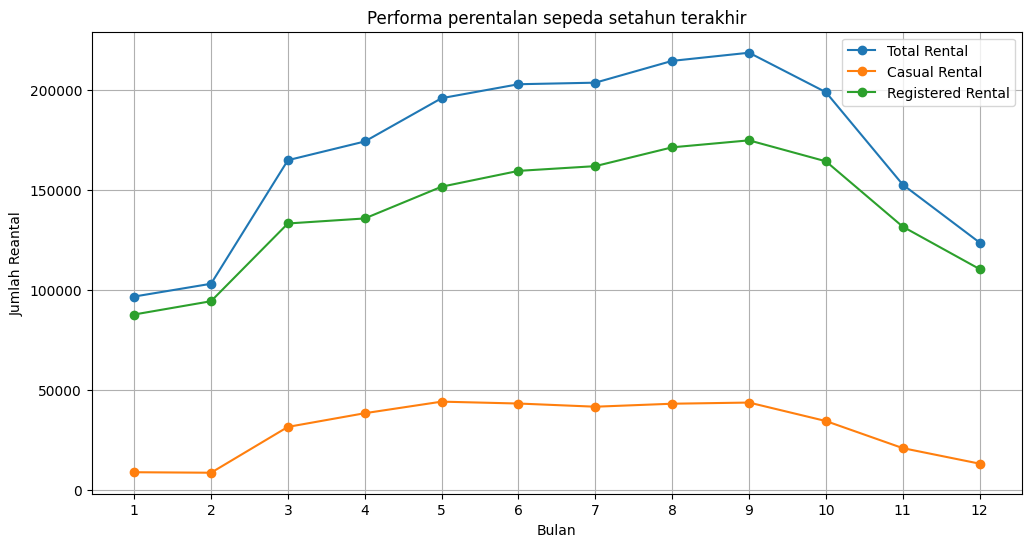

In [56]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['mnth'], monthly_data['total_rentals'], label='Total Rental', marker='o')
plt.plot(monthly_data['mnth'], monthly_data['casual_rentals'], label='Casual Rental', marker='o')
plt.plot(monthly_data['mnth'], monthly_data['registered_rentals'], label='Registered Rental', marker='o')
plt.xticks(range(1, 13))
plt.xlabel('Bulan')
plt.ylabel('Jumlah Reantal')
plt.title('Performa perentalan sepeda setahun terakhir')
plt.legend()
plt.grid()
plt.show()

### Bagaimana cuaca ( temp, wind, hum ) mempengaruhi perentalan

In [74]:
df_weather = all_df
df_last_year = df_weather[df_weather['yr'] == 1]

#### Hubungan temperature dan total rental

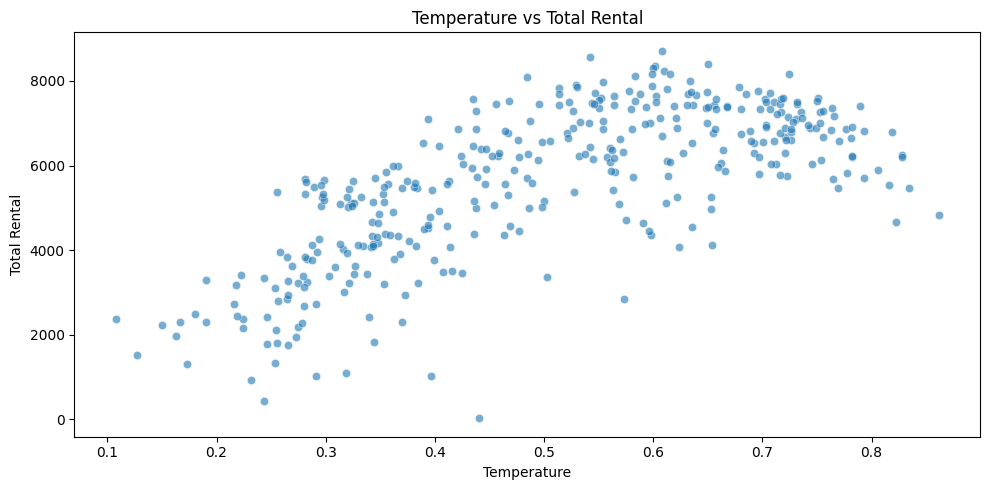

In [83]:
plt.figure(figsize=(10, 5))

sns.scatterplot(x='temp', y='cnt', data=df_last_year, alpha=0.6)
plt.title('Temperature vs Total Rental')
plt.xlabel('Temperature')
plt.ylabel('Total Rental')

plt.tight_layout()
plt.show()

#### Hubungan kecepatan angin dan total rental

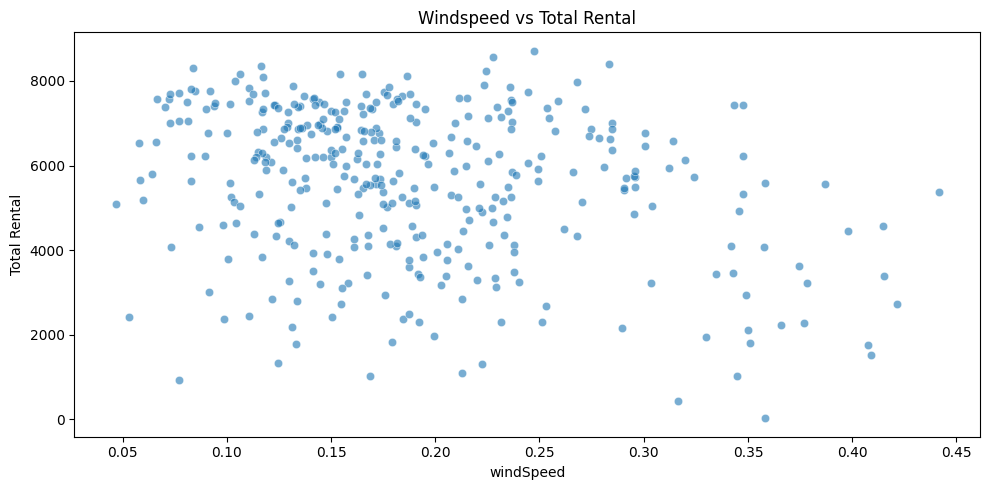

In [84]:
plt.figure(figsize=(10, 5))

sns.scatterplot(x='windspeed', y='cnt', data=df_last_year, alpha=0.6)
plt.title('Windspeed vs Total Rental')
plt.xlabel('windSpeed')
plt.ylabel('Total Rental')

plt.tight_layout()
plt.show()

#### Hubungan Kelembapan dan total rental

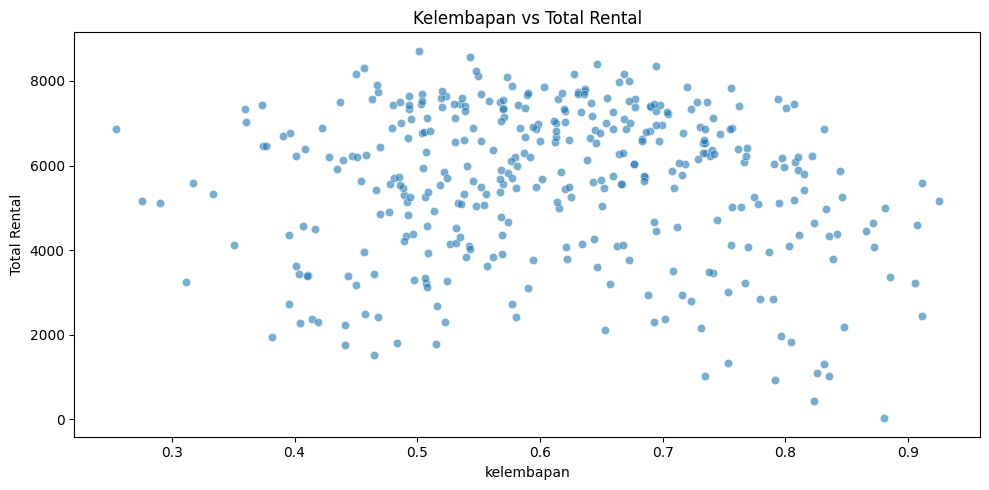

In [81]:
plt.figure(figsize=(10, 5))

sns.scatterplot(x='hum', y='cnt', data=df_last_year, alpha=0.6)
plt.title('Kelembapan vs Total Rental')
plt.xlabel('kelembapan')
plt.ylabel('Total Rental')

plt.tight_layout()
plt.show()

#### Hubungan cuaca dan total rental

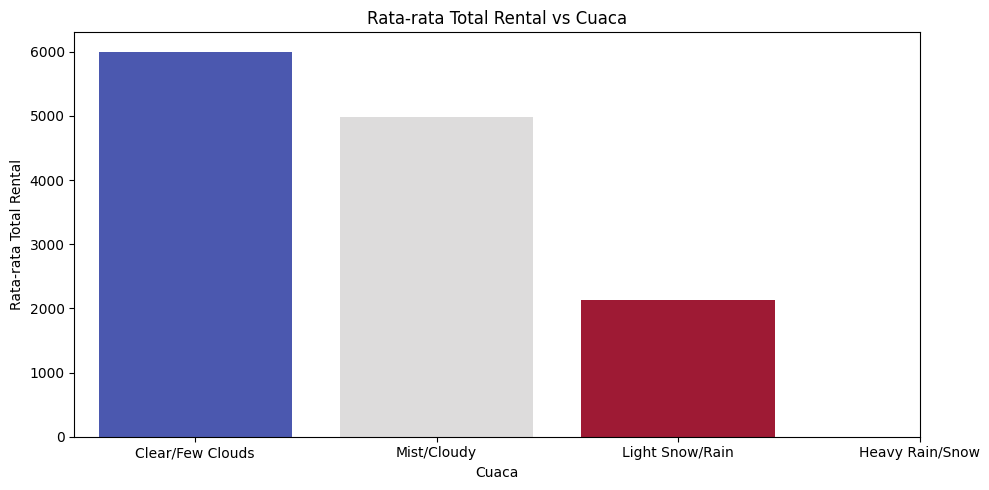

In [87]:
plt.figure(figsize=(10, 5))

sns.barplot(x='weathersit', y='cnt', data=df_last_year, errorbar=None, hue='weathersit', legend=False, palette='coolwarm')
plt.title('Rata-rata Total Rental vs Cuaca')
plt.xlabel('Cuaca')
plt.ylabel('Rata-rata Total Rental')
plt.xticks(ticks=[0, 1, 2, 3], labels=[
    'Clear/Few Clouds',
    'Mist/Cloudy',
    'Light Snow/Rain',
    'Heavy Rain/Snow'
])

plt.tight_layout()
plt.show()

### Hari dengan perbedaan data antara day_df dan hour_df ( Kesalahan perekaman)  

In [70]:
data_mismatch = all_df[all_df['selisih_match'] == False].copy()

In [71]:
data_mismatch['weekday'] = pd.to_datetime(data_mismatch['dteday']).dt.weekday + 1

In [72]:
error_by_day = data_mismatch['weekday'].value_counts().sort_index()

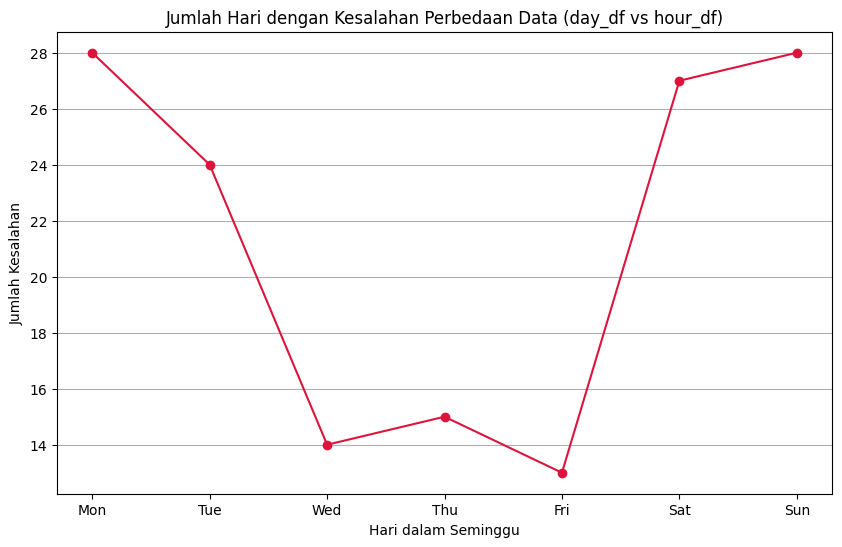

In [73]:
plt.figure(figsize=(10, 6))
plt.plot(error_by_day.index, error_by_day.values, marker='o', linestyle='-', color='crimson')
plt.xticks(ticks=range(1, 8), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.title('Jumlah Hari dengan Kesalahan Perbedaan Data (day_df vs hour_df)')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Jumlah Kesalahan')
plt.grid(axis='y')
plt.show()

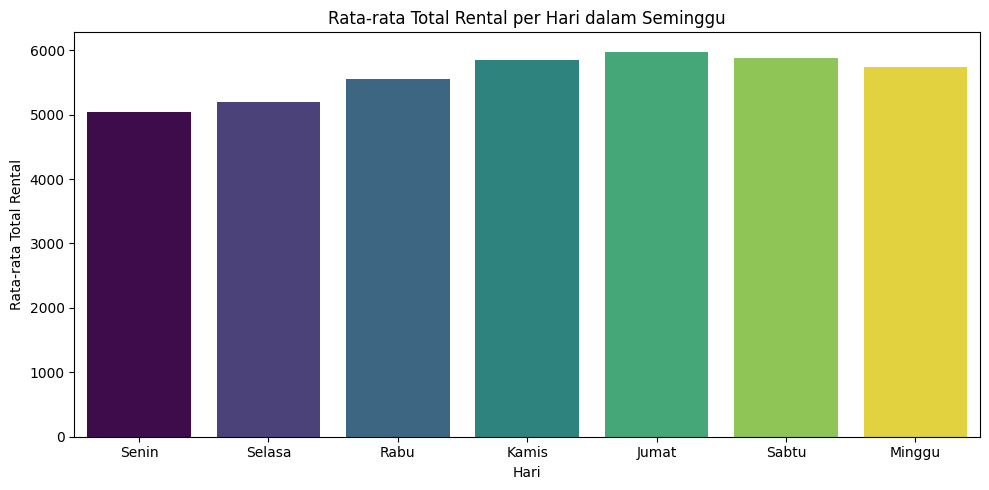

In [93]:
plt.figure(figsize=(10, 5))

avg_rental_by_day = df_last_year.groupby('weekday')['cnt'].mean().reset_index()

sns.barplot(x='weekday', y='cnt', hue='weekday', data=avg_rental_by_day, palette='viridis', legend=False)

plt.title('Rata-rata Total Rental per Hari dalam Seminggu')
plt.xlabel('Hari')
plt.ylabel('Rata-rata Total Rental')

plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=[
    'Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu'
])

plt.tight_layout()
plt.show()

###**Insight:**

- Perentalan mencapai angka 200.000 pada bulan ke 6 sampai 10 ( sebaiknya tambah karyawan sementara )
- Perentalan dibawah angka 150.000 pada bulan 1, 2 , 11, dan 12
- jumlah perental meningkat seiring meningkatnya temperatur
- perental lebih banyak saat kecepatan angin cukup rendah
- perental lebih banyak saat kelembapan tidak tinggi dan tidak rendah
- semakin cerah cuacanya semakin banyak yang rental
- ada banyak kesalahan input data ( perbedaan di day_df dan hour_df ) pada hari senin,selasa,sabtu,dan minggu ( Coba periksan karyawan yang bekerja hari itu )

In [94]:
all_df.to_csv("all_data.csv", index=False)